# Lab 1

- Họ tên: Kim Minh Thắng
- Mã số sinh viên: B2007210

## Bài 1

### Yêu cầu

Xây dựng mô hình:
- 1 Tầng (Dense) gồm 1 neuron
- input_shape: (4,)
- use_bias: `True`
- activation: `sigmoid`

Biên dịch mô hình:
- optimizer = `adam`
- loss: `binary_crossentropy`
- metrics: `['accuracy']`

### Bài làm

#### Đọc và xử lý dữ liệu

Load dữ liệu từ file `Iris.csv` và giữ lại 100 dòng đầu tiên.

In [112]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv("./Iris.csv")

In [114]:
df = df.head(100)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


Tách các cột đặc trưng và nhãn

In [115]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.asarray(X)

Chuyển nhãn về dạng số

In [116]:
Y = df['Species']
Y = [1 if y == 'Iris-setosa' else 0 for y in Y]
Y = np.asarray(Y)

Tách dataset thành dữ liệu train và test với tỉ lệ `80:20`

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Tạo model và biên dịch

In [129]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train model

In [130]:
his = model.fit(X_train, Y_train, epochs=150, batch_size=20, validation_data=(X_test, Y_test), verbose=0)

#### Đánh giá model

In [131]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [132]:
print('Loss: ', score[0])
print('Accuracy: ', score[1])

Loss:  0.5225648283958435
Accuracy:  0.8500000238418579


In [133]:
import matplotlib.pyplot as plt

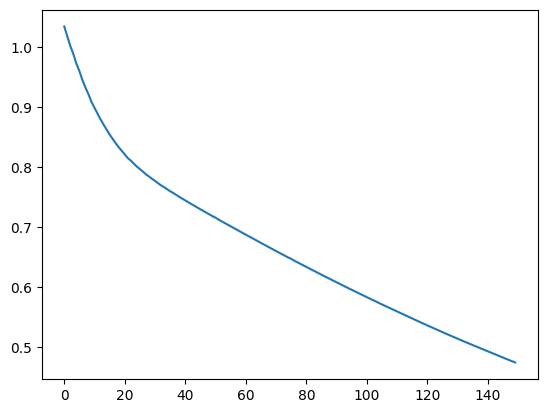

In [134]:
plt.plot(his.history['loss'])

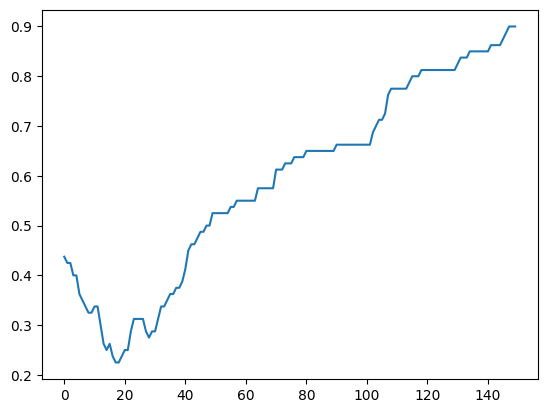

In [135]:
plt.plot(his.history['accuracy'])

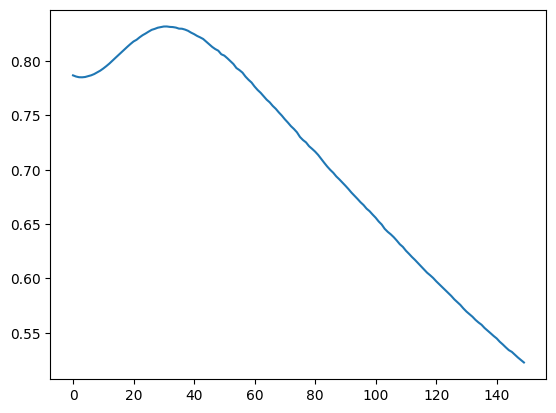

In [136]:
plt.plot(his.history['val_loss'])

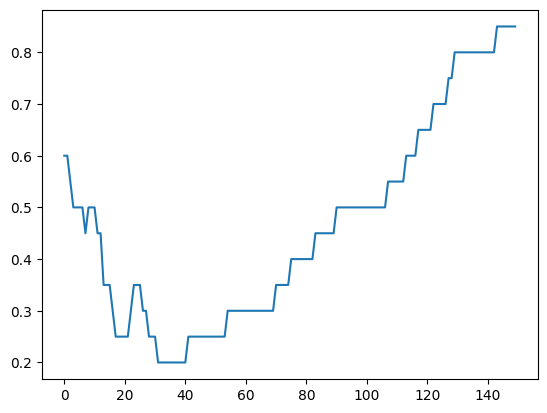

In [137]:
plt.plot(his.history['val_accuracy'])